In [1]:
import os
from collections import Counter

import matplotlib.pyplot as plt
from wordcloud import WordCloud

from config import Config
from risk_detection.analysis.keyword_extraction import keywords_from_file, rake_keywords_from_file

In [2]:
cik = 3116
filename = r'2005-12-31_2006-03-30_0000950137-06-003951'

tr_filename = os.path.join(Config.text_rank_keywords_dir(), str(cik), f'{filename}.txt')
rake_filename = os.path.join(Config.rake_keywords_dir(), str(cik), f'{filename}_rake.txt')

In [3]:
tr_keywords = keywords_from_file(tr_filename)
rake_keywords = rake_keywords_from_file(rake_filename)

In [4]:
def show_wordcloud(keys, filename=None):
    wc = WordCloud(
        width=2000,
        height=1200,
        background_color="white",
        stopwords=set(),
        max_words=1000,
        max_font_size=90,
        random_state=42,
        contour_width=1,
        contour_color="#119DFF",
    )
    wc.generate_from_frequencies(Counter(keys))
    fig = plt.figure(figsize=[20, 12])
    ax = plt.imshow(wc.recolor(), interpolation="bilinear")
    plt.axis("off")
    
    if filename:
        plt.savefig(filename, bbox_inches='tight')
        
    plt.show()

## Uncleaned keywords

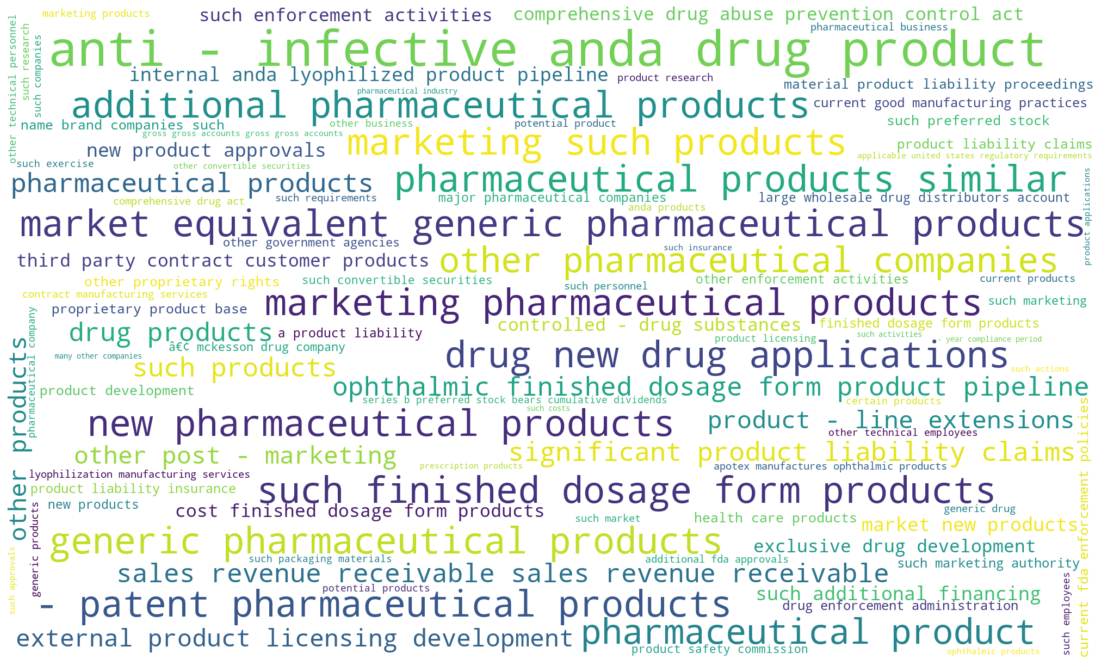

In [7]:
with open(tr_filename, 'r') as f:
    keys = f.read().split('\n')

show_wordcloud(keys, 'plots\\uncleaned_keywords.jpg')

## Comparison of keywords extracted using TextRank and RAKE

Keywords extracted from the risk section of the same report using TextRank and RAKE.

### Keywords extracted using TextRank

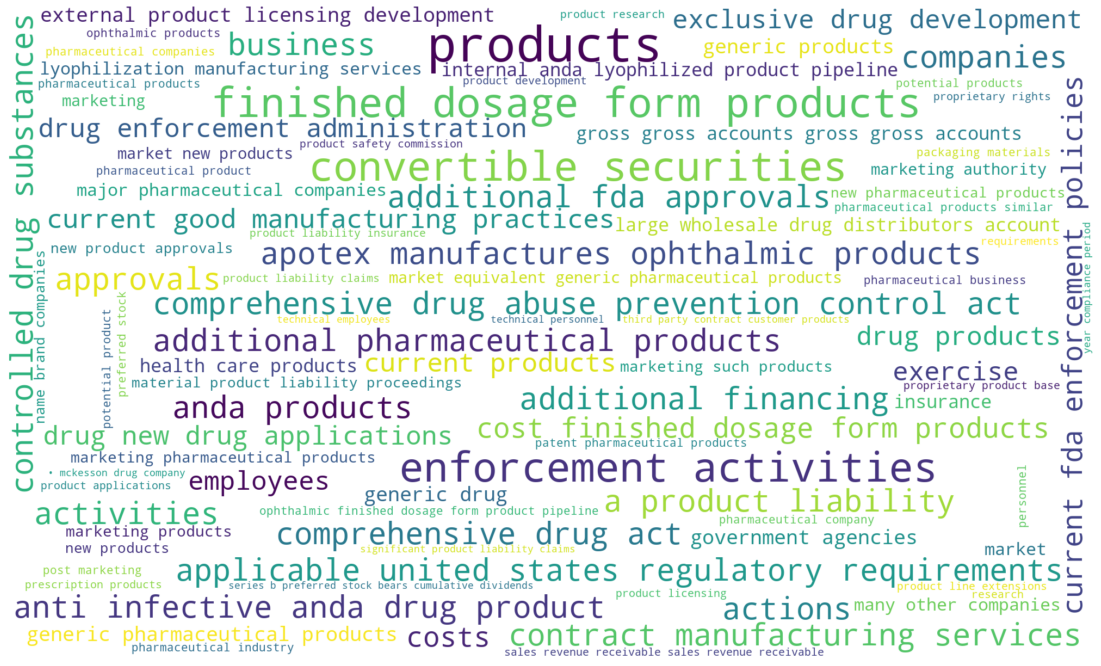

In [5]:
show_wordcloud(tr_keywords.keywords, filename='tr_2005_keywords.jpg')

### Keywords extracted using RAKE

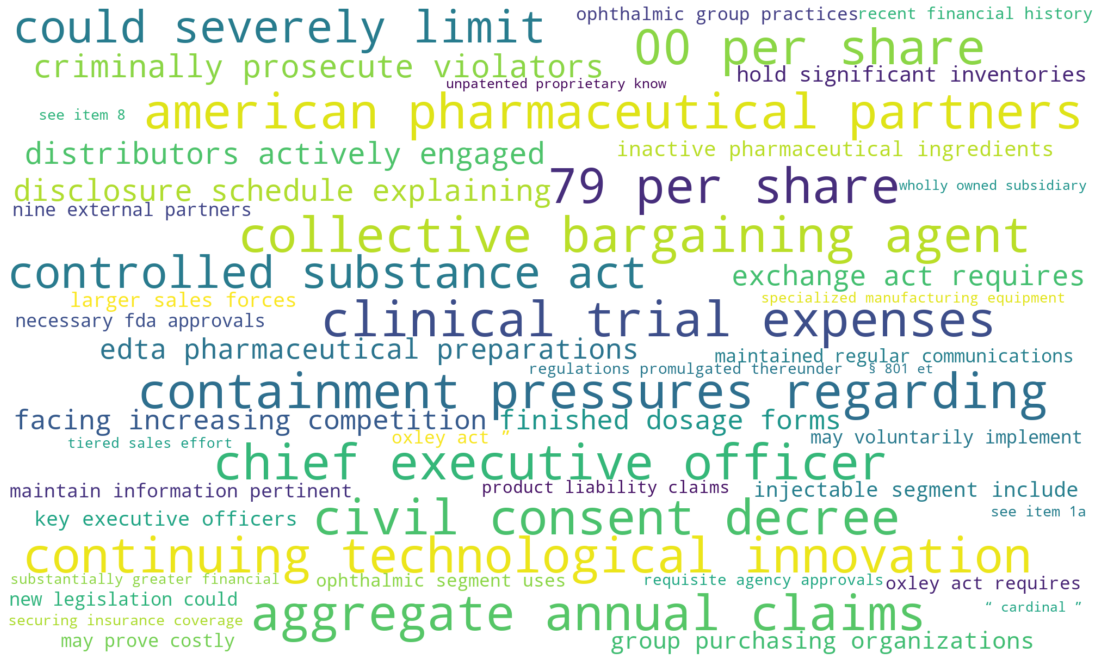

In [6]:
show_wordcloud(rake_keywords.keywords, filename='rake_2005_keywords.jpg')

## Keywords extracted using TextRank in successive years

In [15]:
o_cik = 1000045
curr_filename = r'2008-03-31_2008-06-16_0001193125-08-134501.txt'
next_filename = r'2009-03-31_2009-06-15_0001193125-09-130987.txt'

curr_filename = os.path.join(Config.text_rank_keywords_dir(), str(o_cik), curr_filename)
next_filename = os.path.join(Config.text_rank_keywords_dir(), str(o_cik), next_filename)

curr_keywords = keywords_from_file(curr_filename)
next_keywords = keywords_from_file(next_filename)

### Keywords from 2008

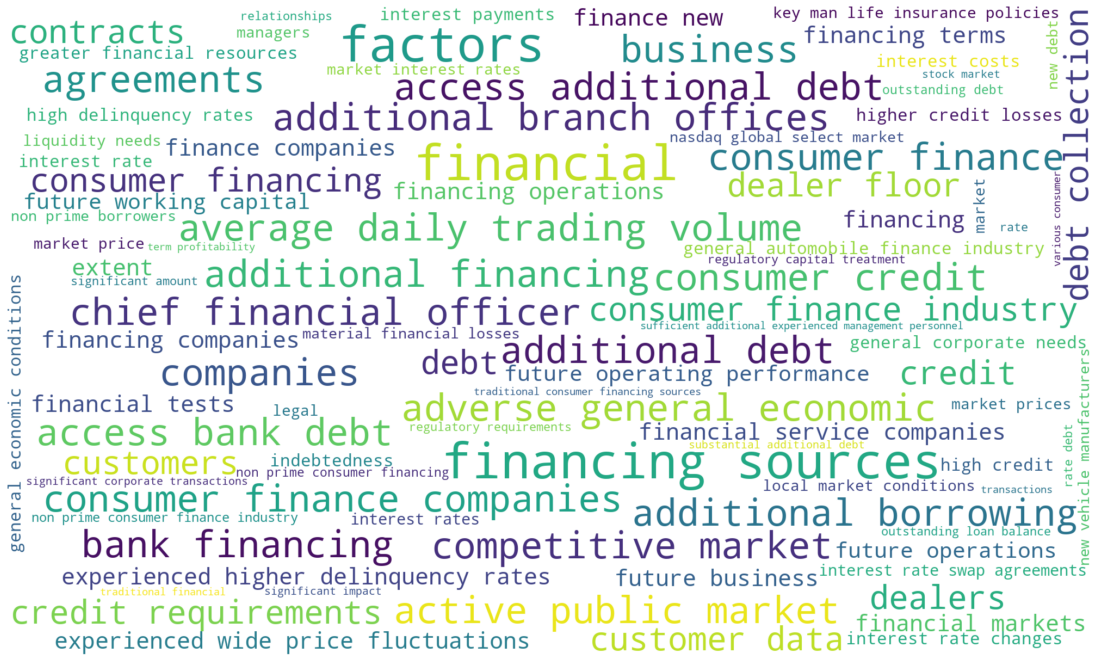

In [18]:
show_wordcloud(curr_keywords.keywords, filename='2008_keywords.jpg')

### Keywords from 2009 

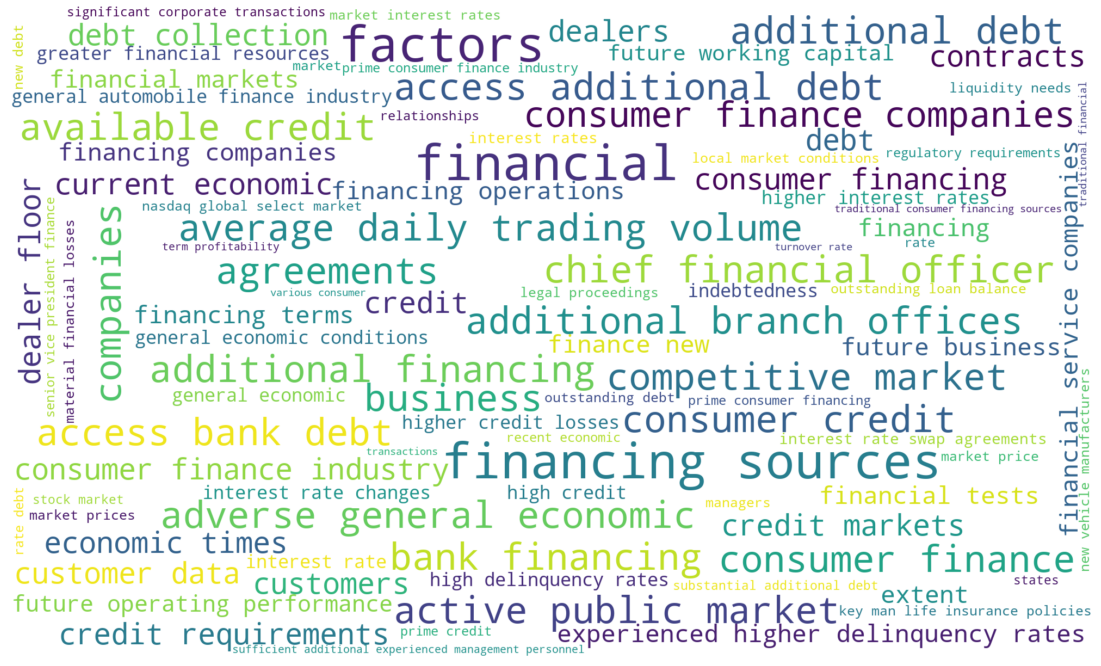

In [19]:
show_wordcloud(next_keywords.keywords, filename='2009_keywords.jpg')